In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


## Data Cleaning

In [3]:
dforiginal = pd.read_csv('Mode_Craft_Ecommerce_Data - Online_Retail.csv')
dforiginal.head(10)

C:\Users\wow01\AppData\Local\Temp\ipykernel_21788\4058506279.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  dforiginal = pd.read_csv('Mode_Craft_Ecommerce_Data - Online_Retail.csv')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
1,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/10 8:26,4.25,17850.0,United Kingdom
2,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
3,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/10 8:26,7.65,17850.0,United Kingdom
5,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
6,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
7,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/10 8:28,1.85,17850.0,United Kingdom
8,536366,22633,HAND WARMER UNION JACK,6,12/1/10 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,1.69,13047.0,United Kingdom


In [4]:
dforiginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
dforiginal['InvoiceDate'] = pd.to_datetime(dforiginal['InvoiceDate'])

C:\Users\wow01\AppData\Local\Temp\ipykernel_21788\2436009276.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dforiginal['InvoiceDate'] = pd.to_datetime(dforiginal['InvoiceDate'])


In [6]:
dforiginal.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
dforiginal = dforiginal.drop_duplicates()

In [8]:
dforiginal[dforiginal['Quantity'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2380,536589,21777,NaN,-10,2010-12-01 16:50:00,0.00,NaN,United Kingdom
4310,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.00,NaN,United Kingdom
7105,536996,22712,NaN,-20,2010-12-03 15:30:00,0.00,NaN,United Kingdom
7106,536997,22028,NaN,-20,2010-12-03 15:30:00,0.00,NaN,United Kingdom
7107,536998,85067,NaN,-6,2010-12-03 15:30:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541904,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541905,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541906,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541907,C581569,20979,36 PENCILS TUBE RED RETROSPOT,-5,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [9]:
dforiginal[dforiginal['UnitPrice'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
613,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1958,536545,21134,NaN,1,2010-12-01 14:32:00,0.00,NaN,United Kingdom
1959,536546,22145,NaN,1,2010-12-01 14:33:00,0.00,NaN,United Kingdom
1960,536547,37509,NaN,1,2010-12-01 14:33:00,0.00,NaN,United Kingdom
1961,536549,85226A,NaN,1,2010-12-01 14:34:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
529253,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.00,NaN,United Kingdom
529302,581408,85175,NaN,20,2011-12-08 14:06:00,0.00,NaN,United Kingdom
529654,581422,23169,smashed,-235,2011-12-08 15:24:00,0.00,NaN,United Kingdom
532619,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom


In [10]:
# Make a copy, ready to clean up dataset
df = dforiginal.copy()

In [11]:
# Drop unreasonable/unrelated data
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
df = df[~df['StockCode'].isin(['B', 'm', 'M', 'AMAZONFEE'])]

In [12]:
df = df.reset_index(drop=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
1,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
2,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
3,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
524553,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France
524554,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
524555,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France
524556,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France


In [13]:
df.groupby("StockCode")['Description'].nunique()

StockCode
10002           1
10080           1
10120           1
10123C          1
10124A          1
               ..
gift_0001_10    1
gift_0001_20    1
gift_0001_30    1
gift_0001_40    1
gift_0001_50    1
Name: Description, Length: 3918, dtype: int64

In [14]:
# Add additional columns for analysis

# Year
df['Year'] = df['InvoiceDate'].dt.year

# Month (1-12)
df['Month'] = df['InvoiceDate'].dt.month

# Date (day of month, 1-31)
df['Day'] = df['InvoiceDate'].dt.day

# Day of Week (Monday=0, Sunday=6)
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# Time of day
df['TimeOfDay'] = df['InvoiceDate'].dt.time

# Quarter
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['Quarter'] = df['Month'].apply(get_season)

# Revenue (Quantity * UnitPrice)
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [15]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,DayOfWeek,TimeOfDay,Quarter,Revenue
0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,2,08:26:00,Winter,22.00
1,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010,12,1,2,08:26:00,Winter,25.50
2,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,2,08:26:00,Winter,20.34
3,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,2,08:26:00,Winter,20.34
4,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2010,12,1,2,08:26:00,Winter,15.30
5,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,2,08:26:00,Winter,15.30
6,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,2,08:26:00,Winter,20.34
7,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010,12,1,2,08:28:00,Winter,11.10
8,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010,12,1,2,08:28:00,Winter,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,2010,12,1,2,08:34:00,Winter,54.08


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524558 entries, 0 to 524557
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    524558 non-null  object        
 1   StockCode    524558 non-null  object        
 2   Description  524558 non-null  object        
 3   Quantity     524558 non-null  int64         
 4   InvoiceDate  524558 non-null  datetime64[ns]
 5   UnitPrice    524558 non-null  float64       
 6   CustomerID   392413 non-null  float64       
 7   Country      524558 non-null  object        
 8   Year         524558 non-null  int32         
 9   Month        524558 non-null  int32         
 10  Day          524558 non-null  int32         
 11  DayOfWeek    524558 non-null  int32         
 12  TimeOfDay    524558 non-null  object        
 13  Quarter      524558 non-null  object        
 14  Revenue      524558 non-null  float64       
dtypes: datetime64[ns](1), float64(3), 

### Checking missing values

In [17]:
# Fill the missing CustomerID with '10000'
df['CustomerID'] = df['CustomerID'].fillna(10000)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524558 entries, 0 to 524557
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    524558 non-null  object        
 1   StockCode    524558 non-null  object        
 2   Description  524558 non-null  object        
 3   Quantity     524558 non-null  int64         
 4   InvoiceDate  524558 non-null  datetime64[ns]
 5   UnitPrice    524558 non-null  float64       
 6   CustomerID   524558 non-null  float64       
 7   Country      524558 non-null  object        
 8   Year         524558 non-null  int32         
 9   Month        524558 non-null  int32         
 10  Day          524558 non-null  int32         
 11  DayOfWeek    524558 non-null  int32         
 12  TimeOfDay    524558 non-null  object        
 13  Quarter      524558 non-null  object        
 14  Revenue      524558 non-null  float64       
dtypes: datetime64[ns](1), float64(3), 

In [18]:
num_countries = df['Country'].nunique()
print(f"Number of unique countries: {num_countries}")
country_counts = df['Country'].value_counts()
print(country_counts)


Number of unique countries: 38
Country
United Kingdom          479707
Germany                   9017
France                    8387
EIRE                      7874
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1958
Portugal                  1485
Australia                 1181
Norway                    1068
Italy                      758
Channel Islands            746
Finland                    684
Cyprus                     602
Sweden                     449
Unspecified                442
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     292
Hong Kong                  277
Singapore                  215
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60


In [19]:
first_day = df['InvoiceDate'].min()
print(f"First day in dataset: {first_day}")

# Find the last day in the dataset
last_day = df['InvoiceDate'].max()
print(f"Last day in dataset: {last_day}")

First day in dataset: 2010-12-01 08:26:00
Last day in dataset: 2011-12-09 12:50:00


In [20]:
# Countryname_correction
df['Country'] = df['Country'].replace('EIRE','Ireland')
df['Country'] = df['Country'].replace('RSA', 'South Afria')
df['Country'] = df['Country'].replace('European Community', 'EU')

### I see that Channel Island(UK) and UK are separared in terms of countries, I wonder why is that. And I wanna dive deeper into the three countries Channel Island(UK), UK, France, since Channel Island(UK) is located between UK and France to see their best sellers, Revenue per Order, Top Customers etc

In [21]:
# Split into two datasets
uk_df = df[df['Country'] == 'United Kingdom']
ci_df = df[df['Country'] == 'Channel Islands']
fr_df = df[df['Country'] == 'France']

In [22]:
# UK: Group by Description and aggregate
uk_goods = uk_df.groupby('Description').agg(
    Times_Sold=('Description', 'count'),
    Total_Quantity=('Quantity', 'sum'),
    Total_Revenue = ('Revenue', 'sum')    
).sort_values(by='Total_Revenue', ascending=False)

# Channel Islands: Group by Description and aggregate
ci_goods = ci_df.groupby('Description').agg(
    Times_Sold=('Description', 'count'),
    Total_Quantity=('Quantity', 'sum'),
    Total_Revenue = ('Revenue', 'sum')    
).sort_values(by='Total_Revenue', ascending=False)

# France: Group by Description and aggregate
fr_goods = fr_df.groupby('Description').agg(
    Times_Sold=('Description', 'count'),
    Total_Quantity=('Quantity', 'sum'),
    Total_Revenue = ('Revenue', 'sum')    
).sort_values(by='Total_Revenue', ascending=False)

print("Top 10 Best Sellers - United Kingdom:")
print(uk_goods.head(10))

print("\nTop 10 Best Sellers - Channel Islands:")
print(ci_goods.head(10))

print("\nTop 10 Best Sellers - France:")
print(ci_goods.head(10))


Top 10 Best Sellers - United Kingdom:
                                    Times_Sold  Total_Quantity  Total_Revenue
Description                                                                  
DOTCOM POSTAGE                             706             706      206248.77
PAPER CRAFT , LITTLE BIRDIE                  1           80995      168469.60
REGENCY CAKESTAND 3 TIER                  1701           11044      141996.09
WHITE HANGING HEART T-LIGHT HOLDER        2216           35722      100444.62
PARTY BUNTING                             1607           16961       93599.43
JUMBO BAG RED RETROSPOT                   1954           44161       86291.10
MEDIUM CERAMIC TOP STORAGE JAR             228           77036       80575.63
PAPER CHAIN KIT 50'S CHRISTMAS            1148           18510       62683.54
ASSORTED COLOUR BIRD ORNAMENT             1392           33636       54589.48
CHILLI LIGHTS                              656           10150       53315.16

Top 10 Best Sellers - Cha

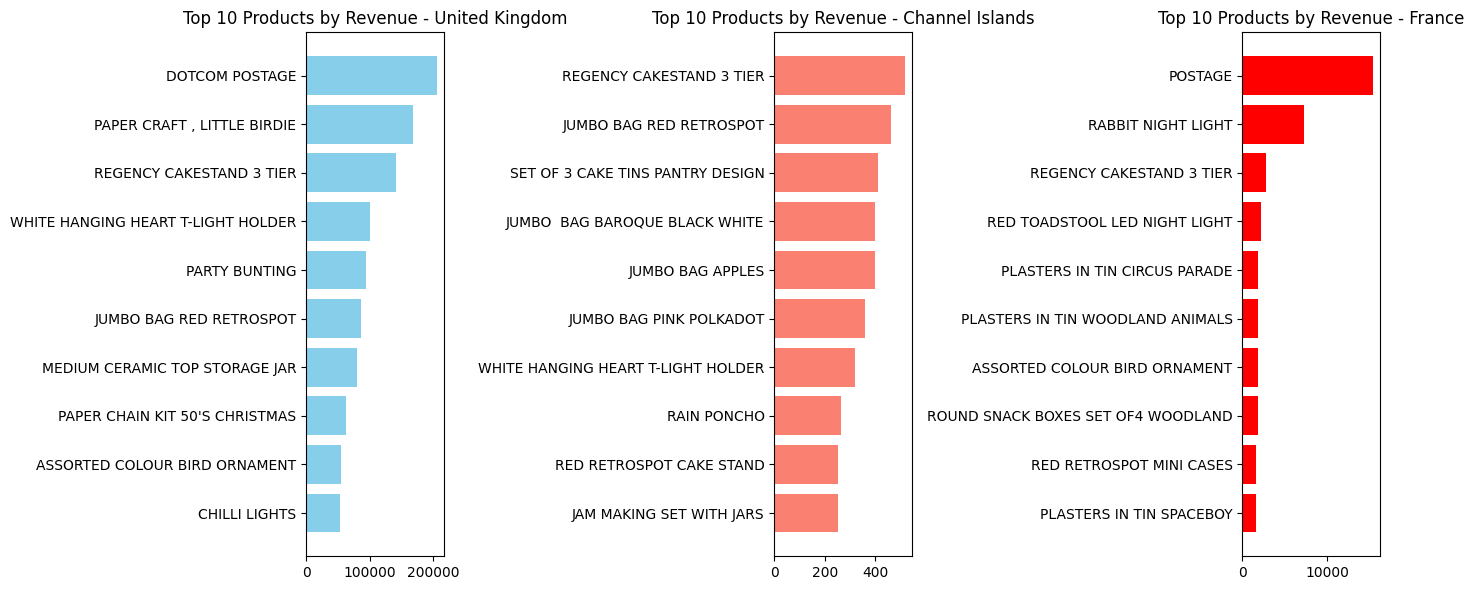

In [23]:
# Plot for United Kingdom
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.barh(uk_goods.head(10).index, uk_goods.head(10)['Total_Revenue'], color='skyblue')
plt.title('Top 10 Products by Revenue - United Kingdom')
plt.gca().invert_yaxis()  # Largest revenue at top

# Plot for Channel Islands
plt.subplot(1, 3, 2)
plt.barh(ci_goods.head(10).index, ci_goods.head(10)['Total_Revenue'], color='salmon')
plt.title('Top 10 Products by Revenue - Channel Islands')
plt.gca().invert_yaxis()

# Plot for France
plt.subplot(1, 3, 3)
plt.barh(fr_goods.head(10).index, fr_goods.head(10)['Total_Revenue'], color='red')
plt.title('Top 10 Products by Revenue - France')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

Insights: Although, United Kingdom and Channel

In [24]:
# Group by 'Description' and aggregate
goods_analysis = df.groupby('Description').agg(
    Times_Sold=('Description', 'count'),  # How many times it appears
    Total_Quantity=('Quantity', 'sum'),   # Sum of all quantities sold
    Total_Revenue = ('Revenue', 'sum')
).sort_values(by='Total_Revenue', ascending=False)

print(goods_analysis)


                                    Times_Sold  Total_Quantity  Total_Revenue
Description                                                                  
DOTCOM POSTAGE                             706             706     206248.770
REGENCY CAKESTAND 3 TIER                  2007           13851     174156.540
PAPER CRAFT , LITTLE BIRDIE                  1           80995     168469.600
WHITE HANGING HEART T-LIGHT HOLDER        2311           37872     106236.720
PARTY BUNTING                             1699           18283      99445.230
...                                        ...             ...            ...
PINK CRYSTAL GUITAR PHONE CHARM              1               1          0.850
VINTAGE BLUE TINSEL REEL                     1               2          0.840
SET 12 COLOURING PENCILS DOILEY              1               1          0.650
HEN HOUSE W CHICK IN NEST                    1               1          0.420
PADS TO MATCH ALL CUSHIONS                   3               3  

Cuz we wanna do a seasonality analysis but we only have a year's data (2010-12-01 2011-12-09). So I got a idea! I will choose one country from Southern Hemisphere and one country from Nothern Hemisphere which they have similar data. Therefore, I choose Austrilia(1181 rows) and Norway (1068 rows). <br>
Australia (Southern Hemisphere) Winter Months: June, July, August (6, 7, 8). 
Summer Months: December, January, February (12, 1, 2)
Norway (Northern Hemisphere) Winter Months: December, January, February (12, 1, 2). 
Summer Months:June, July, August (6, 7, 8)

In [25]:
# Split datasets
aus_df = df[df['Country'] == 'Australia']
norway_df = df[df['Country'] == 'Norway']
# Group by Month
aus_monthly_revenue = aus_df.groupby('Month')['Revenue'].sum()
norway_monthly_revenue = norway_df.groupby('Month')['Revenue'].sum()


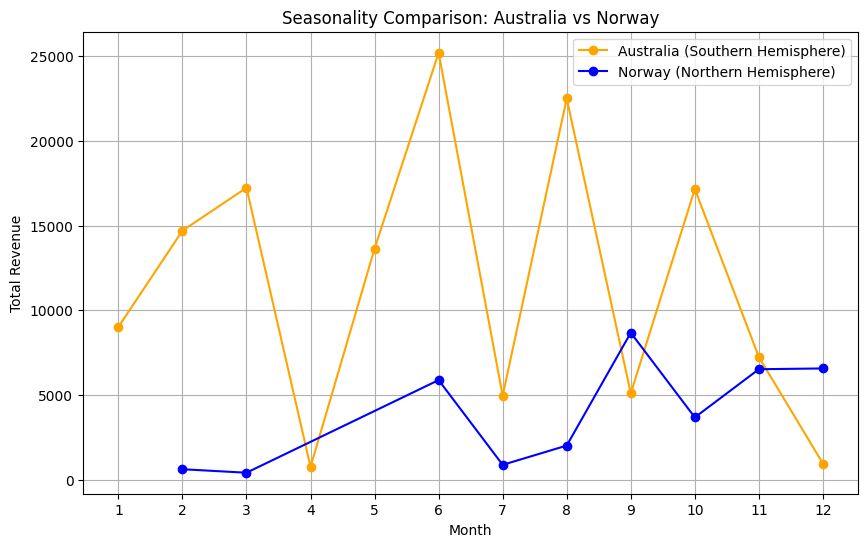

In [26]:
plt.figure(figsize=(10, 6))

plt.plot(aus_monthly_revenue.index, aus_monthly_revenue.values, marker='o', label='Australia (Southern Hemisphere)', color='orange')
plt.plot(norway_monthly_revenue.index, norway_monthly_revenue.values, marker='o', label='Norway (Northern Hemisphere)', color='blue')

plt.title('Seasonality Comparison: Australia vs Norway')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(range(1,13))
plt.legend()
plt.grid(True)
plt.show()


In [27]:
# Winter and Summer months for each
aus_winter = aus_df[aus_df['Month'].isin([6, 7, 8])]
aus_summer = aus_df[aus_df['Month'].isin([12, 1, 2])]

norway_winter = norway_df[norway_df['Month'].isin([12, 1, 2])]
norway_summer = norway_df[norway_df['Month'].isin([6, 7, 8])]


In [28]:
# Australia Winter Best Sellers
aus_winter_best = aus_winter.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)

# Australia Summer Best Sellers
aus_summer_best = aus_summer.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)

# Norway Winter Best Sellers
norway_winter_best = norway_winter.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)

# Norway Summer Best Sellers
norway_summer_best = norway_summer.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)

print("Top 10 Products in Australia Winter:")
print(aus_winter_best)

print("\nTop 10 Products in Australia Summer:")
print(aus_summer_best)

print("\nTop 10 Products in Norway Winter:")
print(norway_winter_best)

print("\nTop 10 Products in Norway Summer:")
print(norway_summer_best)


Top 10 Products in Australia Winter:
Description
FELTCRAFT CHRISTMAS FAIRY              1260.00
RED TOADSTOOL LED NIGHT LIGHT          1202.40
SET OF TEA COFFEE SUGAR TINS PANTRY    1040.55
SET OF 3 REGENCY CAKE TINS             1040.55
VINTAGE CHRISTMAS TABLECLOTH           1039.00
SET 6 SCHOOL MILK BOTTLES IN CRATE      813.60
WOODEN ADVENT CALENDAR CREAM            765.00
RETROSPOT TEA SET CERAMIC 11 PC         728.85
SET OF 4 KNICK KNACK TINS DOILEY        724.15
REGENCY CAKESTAND 3 TIER                700.80
Name: Revenue, dtype: float64

Top 10 Products in Australia Summer:
Description
SET OF 3 CAKE TINS PANTRY DESIGN     1064.55
SET OF 6 SPICE TINS PANTRY DESIGN     792.60
REGENCY CAKESTAND 3 TIER              700.80
HOMEMADE JAM SCENTED CANDLES          634.80
SET 2 PANTRY DESIGN TEA TOWELS        550.00
PICNIC BOXES SET OF 3 RETROSPOT       510.00
JAM MAKING SET WITH JARS              456.00
RED RETROSPOT ROUND CAKE TINS         429.60
COTTON APRON PANTRY DESIGN            425

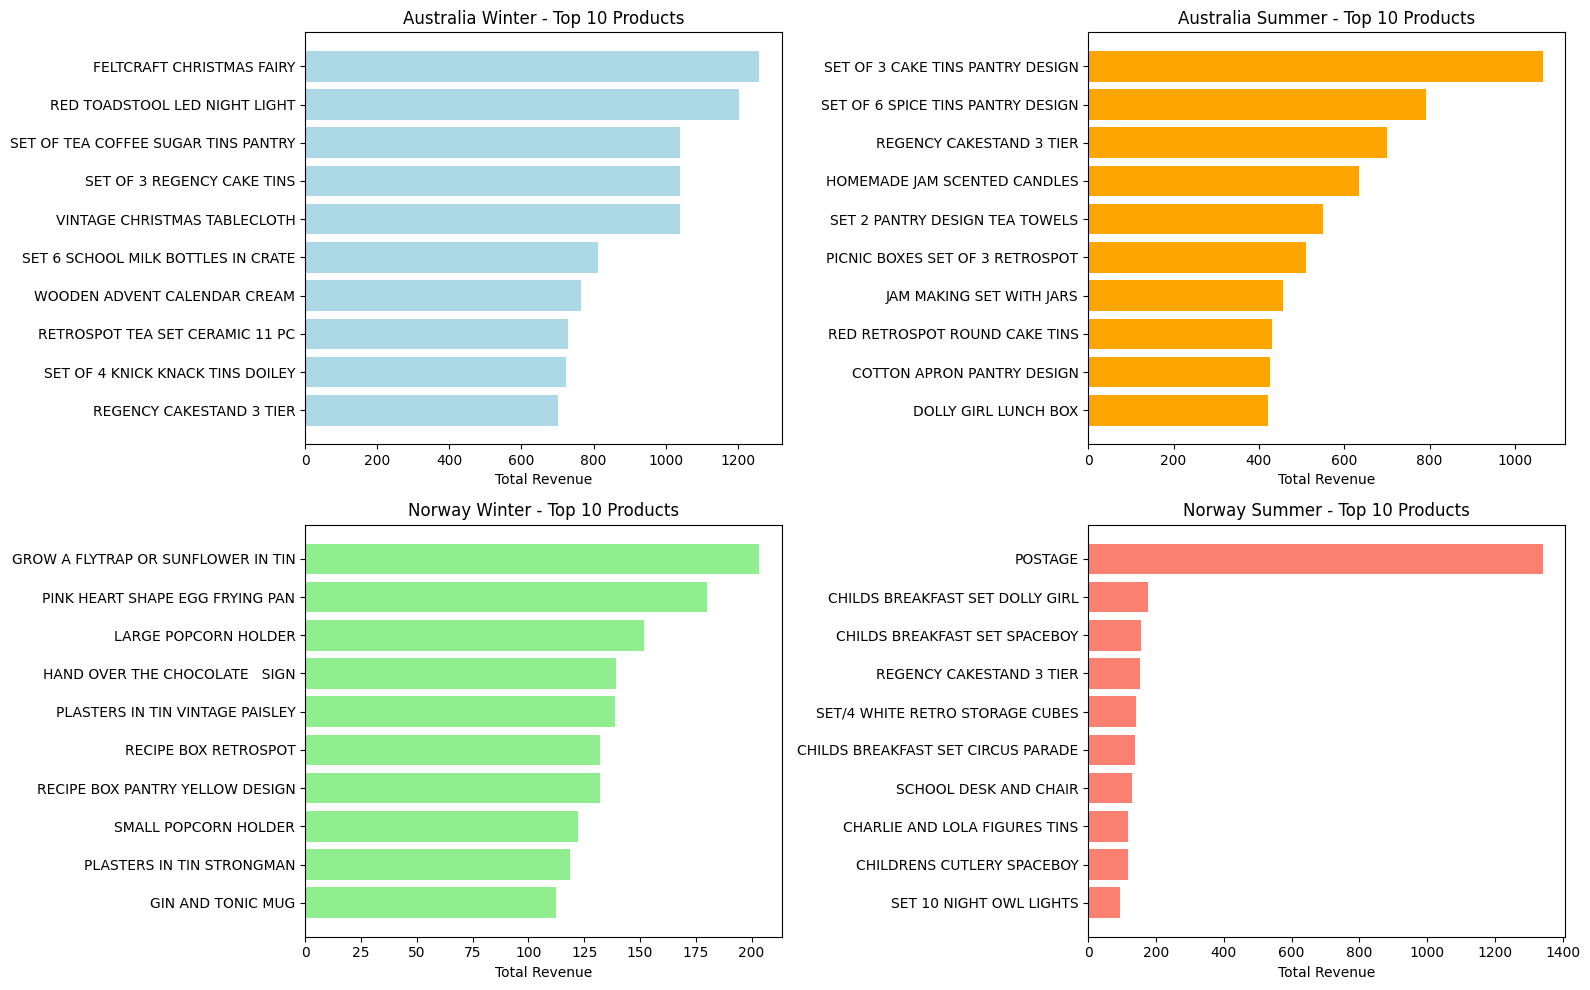

In [29]:
# Set up the plot
plt.figure(figsize=(16, 10))

# Australia Winter
plt.subplot(2, 2, 1)
plt.barh(aus_winter_best.index, aus_winter_best.values, color='lightblue')
plt.title('Australia Winter - Top 10 Products')
plt.xlabel('Total Revenue')
plt.gca().invert_yaxis()

# Australia Summer
plt.subplot(2, 2, 2)
plt.barh(aus_summer_best.index, aus_summer_best.values, color='orange')
plt.title('Australia Summer - Top 10 Products')
plt.xlabel('Total Revenue')
plt.gca().invert_yaxis()

# Norway Winter
plt.subplot(2, 2, 3)
plt.barh(norway_winter_best.index, norway_winter_best.values, color='lightgreen')
plt.title('Norway Winter - Top 10 Products')
plt.xlabel('Total Revenue')
plt.gca().invert_yaxis()

# Norway Summer
plt.subplot(2, 2, 4)
plt.barh(norway_summer_best.index, norway_summer_best.values, color='salmon')
plt.title('Norway Summer - Top 10 Products')
plt.xlabel('Total Revenue')
plt.gca().invert_yaxis()

# Tight layout
plt.tight_layout()
plt.show()

## Exploratory Data Analysis (EDA)

### Seasonality Trends

In [30]:
df.groupby('Year')['Month'].unique()

Year
2010                                       [12]
2011    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Name: Month, dtype: object

In [31]:
def seasonality_trend(df, product):
    product_df = df[df['Description'] == product]

    trend = product_df.groupby(['Year', 'Month'])['Quantity'].sum().reset_index()
    trend['YearMonth'] = pd.to_datetime(trend[['Year', 'Month']].assign(DAY=1))
    
    # Plotting
    plt.figure(figsize=(12,6))
    plt.plot(trend['YearMonth'], trend['Quantity'], marker='o')
    plt.title(f'Long-term Seasonality of {product} Sales')
    plt.xlabel('Year-Month')
    plt.ylabel('Quantity Sold')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

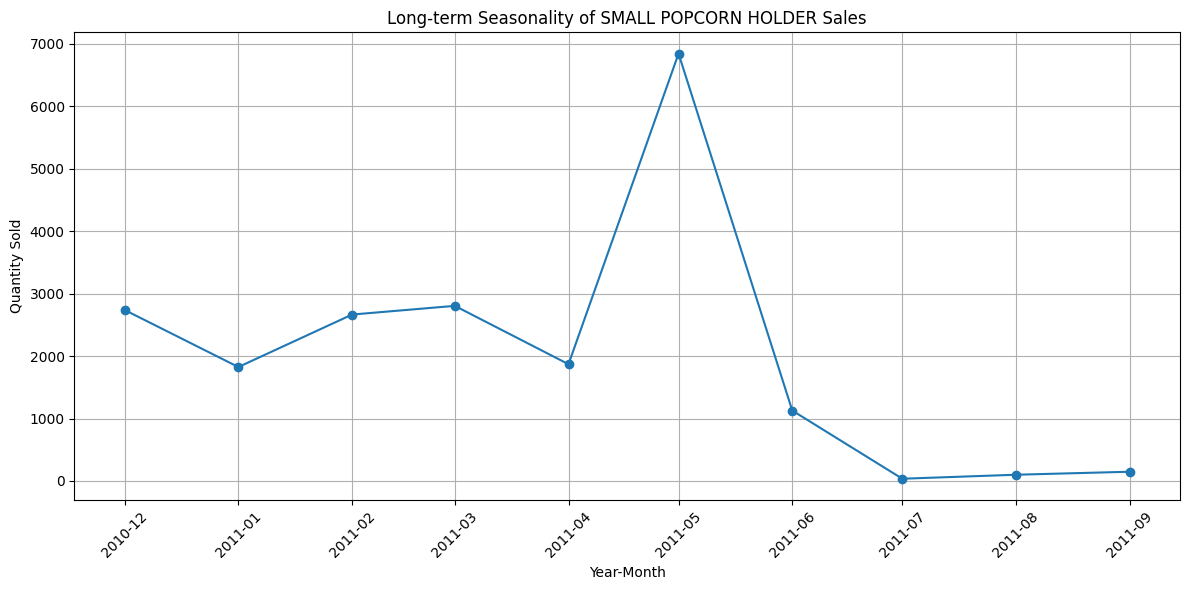

In [32]:
seasonality_trend(df, 'SMALL POPCORN HOLDER')

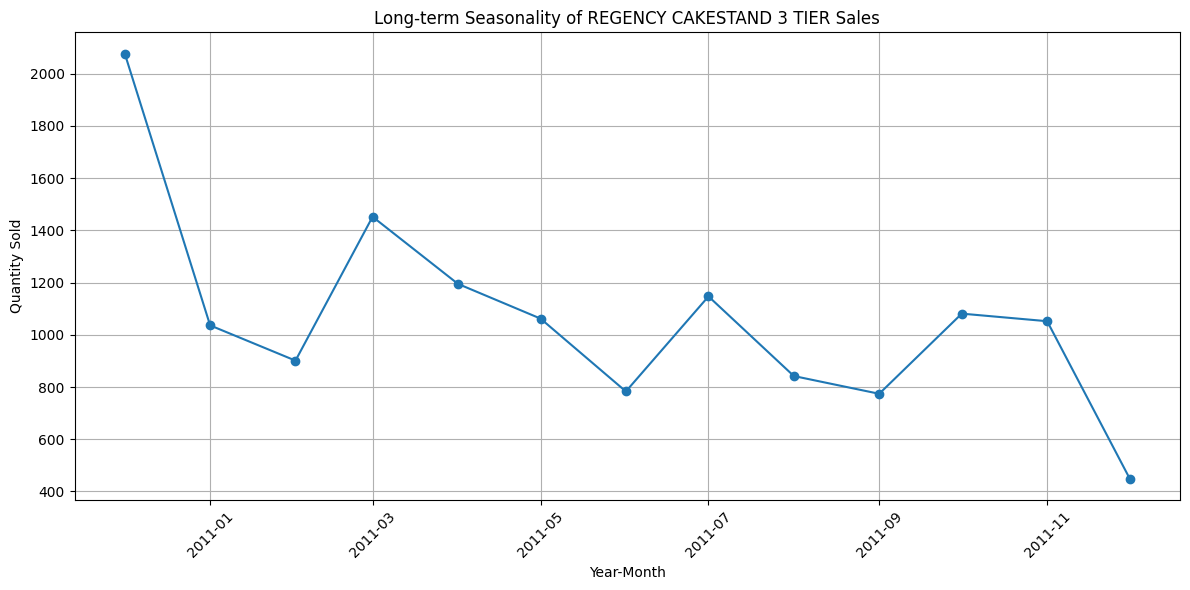

In [33]:
seasonality_trend(df, 'REGENCY CAKESTAND 3 TIER')

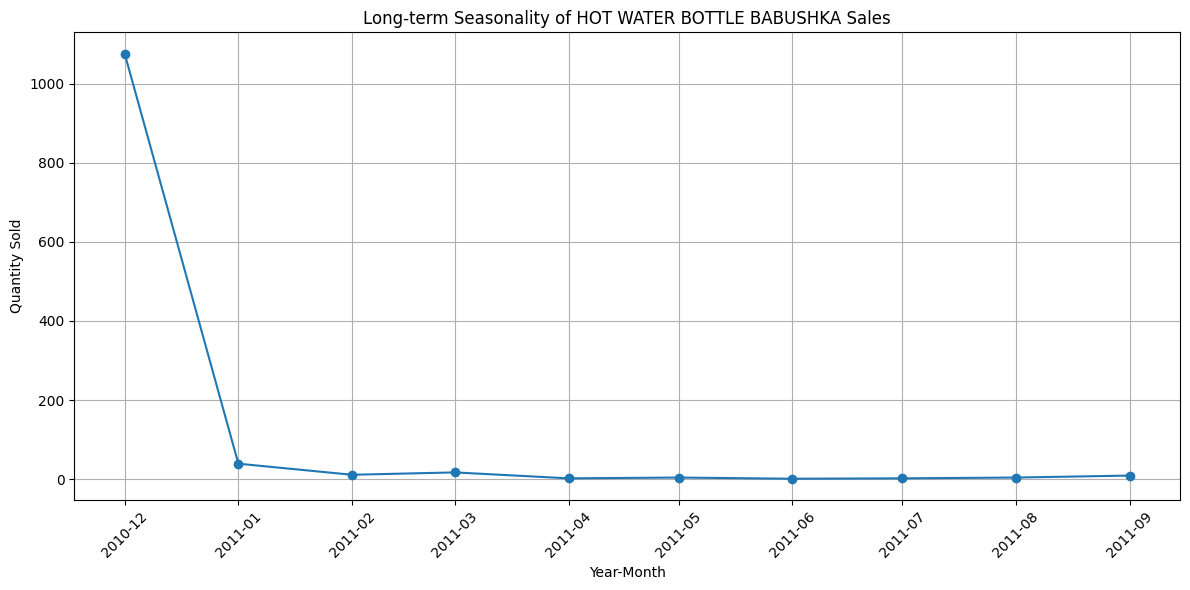

In [34]:
seasonality_trend(df, 'HOT WATER BOTTLE BABUSHKA')

### Monthly Analysis Report (December 2010)

In [35]:
# Filter data for the selected year and month
df_new = df[(df['Year'] == 2010) & (df['Month'] == 12)]

# Products that sold the most
df_new.groupby(['StockCode', 'Description'])['Quantity'].sum().sort_values(ascending=False).head(5)

StockCode  Description                       
84077      WORLD WAR 2 GLIDERS ASSTD DESIGNS     5195
21212      PACK OF 72 RETROSPOT CAKE CASES       4106
85123A     WHITE HANGING HEART T-LIGHT HOLDER    3752
22834      HAND WARMER BABUSHKA DESIGN           3476
22197      SMALL POPCORN HOLDER                  2737
Name: Quantity, dtype: int64

In [36]:
# Products that sold the least
df_new.groupby(['StockCode', 'Description'])['Quantity'].sum().sort_values().head(5)

StockCode     Description                       
gift_0001_50  Dotcomgiftshop Gift Voucher �50.00    1
21196         ROUND WHITE CONFETTI IN TUBE          1
90142D        MOP PENDANT SHELL NECKLACE            1
90144         SILVER DROP EARRINGS WITH FLOWER      1
84816         DANISH ROSE BEDSIDE CABINET           1
Name: Quantity, dtype: int64

In [37]:
# Products that generated the most revenue
df_new.groupby(['StockCode', 'Description'])['Revenue'].sum().sort_values(ascending=False).head(5)

StockCode  Description                       
22423      REGENCY CAKESTAND 3 TIER              27694.76
DOT        DOTCOM POSTAGE                        24671.19
85123A     WHITE HANGING HEART T-LIGHT HOLDER    10435.36
84029E     RED WOOLLY HOTTIE WHITE HEART.         9291.73
22086      PAPER CHAIN KIT 50'S CHRISTMAS         9208.10
Name: Revenue, dtype: float64

In [38]:
# Products that generated the least revenue
df_new.groupby(['StockCode', 'Description'])['Revenue'].sum().sort_values().head(5)

StockCode  Description                     
71215      METAL BASE FOR CANDLES              0.42
79151B     SILICON CUBE 25W, BLUE              0.42
79149B     SILICON STAR BULB  BLUE             0.42
47422      ASSORTED MONKEY SUCTION CUP HOOK    0.42
10123C     HEARTS WRAPPING TAPE                0.65
Name: Revenue, dtype: float64

In [39]:
# Customers who bought the most
df_new.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False).head(5)

CustomerID
10000.0    46963
15061.0     9171
16029.0     7956
14646.0     6714
18102.0     6695
Name: Quantity, dtype: int64

In [40]:
# Most popular days of the week
df_new.groupby('DayOfWeek')['Quantity'].count().sort_values(ascending=False)

DayOfWeek
4    7896
0    7686
3    7458
2    7063
1    6377
6    4477
Name: Quantity, dtype: int64

In [41]:
# Most popular times for purchase during the week
df_new.groupby('TimeOfDay')['Quantity'].count().sort_values(ascending=False).head(5)

TimeOfDay
16:57:00    721
14:09:00    701
14:25:00    692
14:41:00    664
14:59:00    646
Name: Quantity, dtype: int64

In [42]:
# Regions that earned the most money
df_new.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(5)

Country
United Kingdom    730060.63
Germany            15205.74
Ireland            10033.26
France              9616.31
Netherlands         8784.48
Name: Revenue, dtype: float64

### divide them into northern and southern hemisphere

In [43]:
# Define Northern and Southern Hemisphere countries
northern_countries = [
    'United Kingdom', 'France', 'Netherlands', 'Germany', 'Norway', 'EIRE', 'Switzerland',
    'Spain', 'Poland', 'Portugal', 'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
    'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland', 'Austria', 'Bahrain',
    'Israel', 'Greece', 'Hong Kong', 'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
    'Czech Republic', 'Canada', 'USA', 'European Community', 'Malta', 'Singapore'  # Singapore stays here for simplicity
]

southern_countries = ['Australia', 'Brazil', 'RSA']  # RSA = South Africa

# Drop rows with 'Unspecified'
df_clean = df[df['Country'] != 'Unspecified']

# Split the dataframe
df_north = df_clean[df_clean['Country'].isin(northern_countries)]
df_south = df_clean[df_clean['Country'].isin(southern_countries)]

C:\Users\wow01\AppData\Local\Temp\ipykernel_21788\3932270385.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_north['InvoiceDate'] = pd.to_datetime(df_north['InvoiceDate'])
C:\Users\wow01\AppData\Local\Temp\ipykernel_21788\3932270385.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_south['InvoiceDate'] = pd.to_datetime(df_south['InvoiceDate'])
C:\Users\wow01\AppData\Local\Temp\ipykernel_21788\3932270385.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

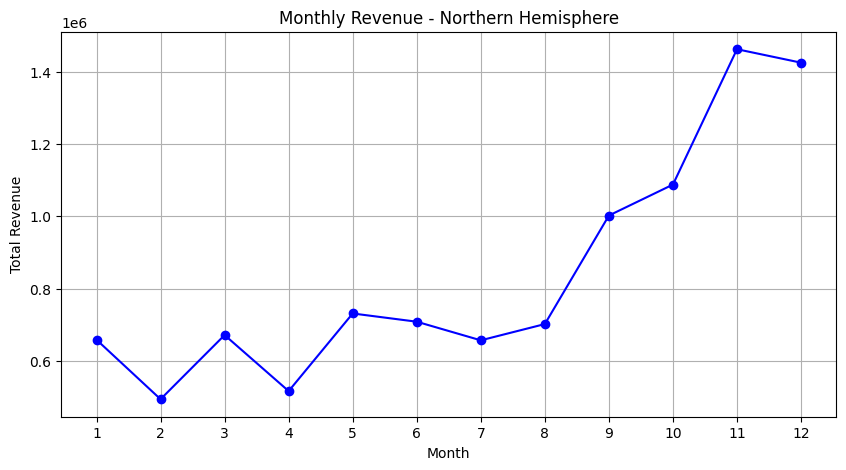

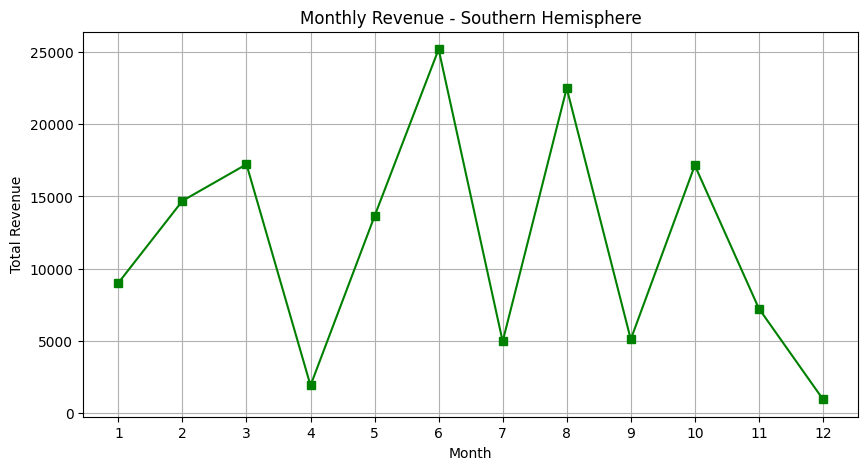

In [49]:
import matplotlib.pyplot as plt

# Make sure 'InvoiceDate' is datetime
df_north['InvoiceDate'] = pd.to_datetime(df_north['InvoiceDate'])
df_south['InvoiceDate'] = pd.to_datetime(df_south['InvoiceDate'])

# Add 'Month' column
df_north['Month'] = df_north['InvoiceDate'].dt.month
df_south['Month'] = df_south['InvoiceDate'].dt.month

# Group by month and calculate total revenue
north_monthly_revenue = df_north.groupby('Month')['Revenue'].sum()
south_monthly_revenue = df_south.groupby('Month')['Revenue'].sum()

# Plot Northern Hemisphere
plt.figure(figsize=(10, 5))
plt.plot(north_monthly_revenue.index, north_monthly_revenue.values, marker='o', color='blue')
plt.title('Monthly Revenue - Northern Hemisphere')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

# Plot Southern Hemisphere
plt.figure(figsize=(10, 5))
plt.plot(south_monthly_revenue.index, south_monthly_revenue.values, marker='s', color='green')
plt.title('Monthly Revenue - Southern Hemisphere')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


C:\Users\wow01\AppData\Local\Temp\ipykernel_21788\4158015833.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_north['InvoiceDate'] = pd.to_datetime(df_north['InvoiceDate'])
C:\Users\wow01\AppData\Local\Temp\ipykernel_21788\4158015833.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_south['InvoiceDate'] = pd.to_datetime(df_south['InvoiceDate'])
C:\Users\wow01\AppData\Local\Temp\ipykernel_21788\4158015833.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

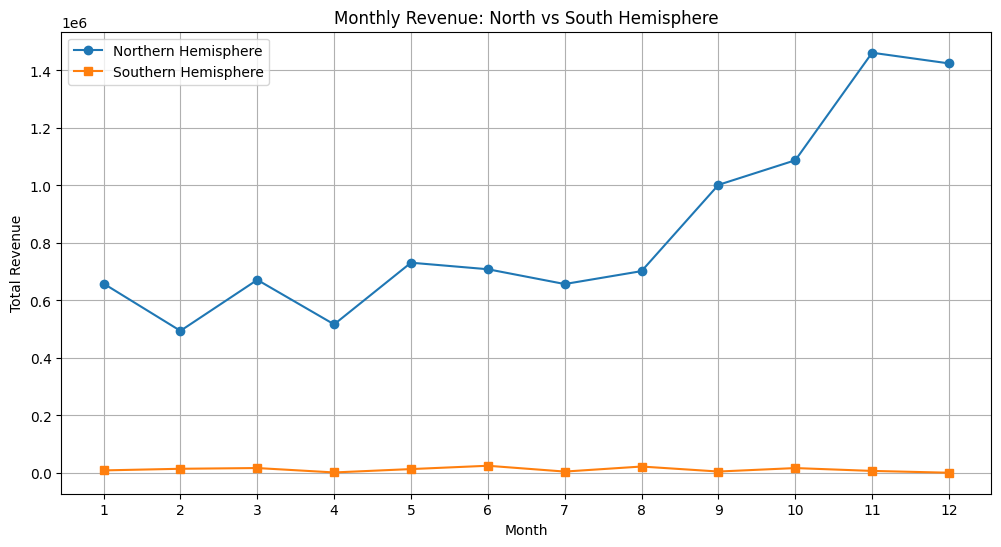

In [50]:
import matplotlib.pyplot as plt

# First, make sure 'InvoiceDate' is datetime if it’s not already
df_north['InvoiceDate'] = pd.to_datetime(df_north['InvoiceDate'])
df_south['InvoiceDate'] = pd.to_datetime(df_south['InvoiceDate'])

# Add 'Month' column
df_north['Month'] = df_north['InvoiceDate'].dt.month
df_south['Month'] = df_south['InvoiceDate'].dt.month

# Group by month and calculate total revenue
north_monthly_revenue = df_north.groupby('Month')['Revenue'].sum()
south_monthly_revenue = df_south.groupby('Month')['Revenue'].sum()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(north_monthly_revenue.index, north_monthly_revenue.values, label='Northern Hemisphere', marker='o')
plt.plot(south_monthly_revenue.index, south_monthly_revenue.values, label='Southern Hemisphere', marker='s')
plt.title('Monthly Revenue: North vs South Hemisphere')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(range(1,13))  # Show all months
plt.legend()
plt.grid(True)
plt.show()

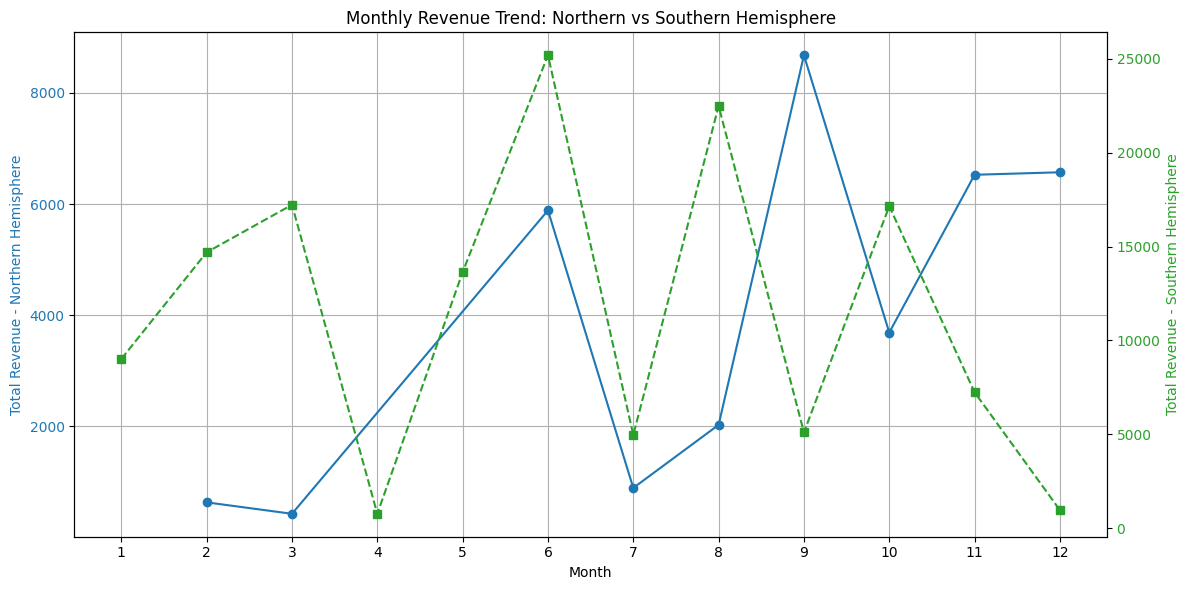

In [52]:
import matplotlib.pyplot as plt

# Assuming you already have:
# aus_monthly_revenue (Southern Hemisphere, smaller scale)
# norway_monthly_revenue (Northern Hemisphere, larger scale)

# Create the main plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Northern Hemisphere (e.g., Norway) - left y-axis
color = 'tab:blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Revenue - Northern Hemisphere', color=color)
ax1.plot(norway_monthly_revenue.index, norway_monthly_revenue.values, marker='o', color=color, label='Northern Hemisphere (Norway)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(range(1,13))
ax1.grid(True)

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot Southern Hemisphere (e.g., Australia) - right y-axis
color = 'tab:green'
ax2.set_ylabel('Total Revenue - Southern Hemisphere', color=color)
ax2.plot(aus_monthly_revenue.index, aus_monthly_revenue.values, marker='s', linestyle='--', color=color, label='Southern Hemisphere (Australia)')
ax2.tick_params(axis='y', labelcolor=color)

# Add title
plt.title('Monthly Revenue Trend: Northern vs Southern Hemisphere')

# Tight layout
fig.tight_layout()
plt.show()



### Specific Product Analysis

Create a way to see a report for a specific product 
1. Quantity Sold by Country
2. Quantity Sold by Month
3. Quantity Sold by Time of Day
4. Quantity Sold by Day of Week
5. Total Quantity Sold 
6. Total Revenue Generated

In [44]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,DayOfWeek,TimeOfDay,Quarter,Revenue
0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,2,08:26:00,Winter,22.00
1,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010,12,1,2,08:26:00,Winter,25.50
2,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,2,08:26:00,Winter,20.34
3,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,2,08:26:00,Winter,20.34
4,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2010,12,1,2,08:26:00,Winter,15.30


In [45]:
# Specify a product name
product_name = "CREAM CUPID HEARTS COAT HANGER"
product_df = df[df['Description'] == product_name]

# Quantity Sold by Country
quantity_by_country = product_df.groupby('Country')['Quantity'].sum().sort_values(ascending=False)
print("Quantity Sold by Country:")
print(quantity_by_country)

Quantity Sold by Country:
Country
United Kingdom    1452
Netherlands        476
Germany             64
Ireland             19
Austria              4
Name: Quantity, dtype: int64


In [46]:
quantity_by_quarter = product_df.groupby('Quarter')['Quantity'].sum().sort_index()
print("\nQuantity Sold by Quarter:")
print(quantity_by_quarter)


Quantity Sold by Quarter:
Quarter
Autumn    219
Spring    503
Summer    483
Winter    810
Name: Quantity, dtype: int64


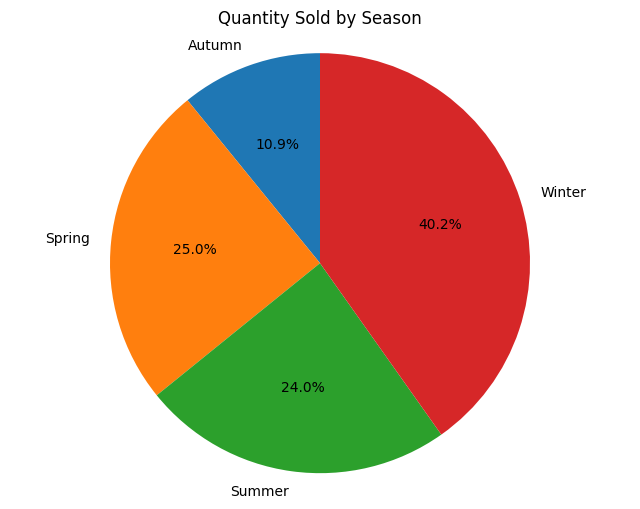

In [47]:
data = quantity_by_quarter
# Plot
plt.figure(figsize=(8, 6))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)
plt.title('Quantity Sold by Season')
plt.axis('equal')  # Ensures pie is drawn as a circle
plt.show()

### Customer Insights

### Geographical Analysis

### Products Ranking